In [1]:
import numpy as np
import matplotlib.pyplot as plt
# display plots in this notebook
%matplotlib inline

 #设置默认显示参数
plt.rcParams['figure.figsize'] = (10, 10)        # 图像显示大小
plt.rcParams['image.interpolation'] = 'nearest'  # 最近邻差值: 像素为正方形
plt.rcParams['image.cmap'] = 'gray'  # 使用灰度输出而不是彩色输出

In [2]:
import sys
caffe_root = '/Users/caishaofan/Desktop/BUAA/Caffe/caffe/'
print (caffe_root)
sys.path.insert(0, caffe_root + 'python')

import caffe

from pylab import *
%matplotlib inline
import tempfile

import platform
caffe.set_mode_cpu()
import lmdb


/Users/caishaofan/Desktop/BUAA/Caffe/caffe/


In [339]:
import scipy.io as sio
import os
import sys


## Read PIE dataset
def read_mat ( path ):
    c = 0
    X ,y ,isTest= [], [],[]

    for filename in os.listdir ( path ):
        if (filename != 'Thumbs.db'):
            data = sio.loadmat( os.path.join ( path , filename ))
#             np.concatenate((X, data['fea']),axis = 0)
#             np.concatenate((y, data['gnd']),axis = 0)
            if len(X) == 0 and len(y) == 0:
                X = data['fea']
                y = data['gnd']
                isTest = data['isTest']
            else:
                X = np.concatenate((data['fea'], X), axis = 0)
                y =np.concatenate((data['gnd'], y), axis = 0)
                isTest = np.concatenate((data['isTest'],isTest), axis = 0)
    return X, y, isTest

ROOT = 'dataset/PIE dataset/'
X,y,isTest = read_mat(ROOT)
X = np.array(X)
y = np.array(y)
isTest = np.array(isTest)

print X.shape
print X
print y.shape
print y
print isTest.shape
print isTest

(11554, 4096)
[[ 46  52  48 ..., 226 234 238]
 [ 50  39  32 ..., 255 254 254]
 [ 47  47  39 ..., 254 254 254]
 ..., 
 [ 11  10   8 ...,  36  40  42]
 [  9  11   9 ...,  29  31  36]
 [ 12   9   9 ...,  29  34  38]]
(11554, 1)
[[ 1]
 [ 1]
 [ 1]
 ..., 
 [68]
 [68]
 [68]]
(11554, 1)
[[ 0.]
 [ 0.]
 [ 0.]
 ..., 
 [ 1.]
 [ 0.]
 [ 0.]]


In [340]:
X_train, X_test, y_train, y_test = [],[],[],[]
for i in np.arange(len(isTest)):
    if(isTest[i] == 0):
        if len(X_train) == 0 and len(y_train) == 0:
            X_train = X[i]
            y_train = y[i]
        else:
            X_train = np.vstack((X[i], X_train))
            y_train = np.vstack((y[i], y_train))
    else:
        if len(X_test) == 0 and len(y_test) == 0:
            X_test = X[i]
            y_test = y[i]
        else:
            X_test = np.vstack((X[i], X_test))
            y_test = np.vstack((y[i], y_test))

print X_train
print X_train.shape

[[ 12   9   9 ...,  29  34  38]
 [  9  11   9 ...,  29  31  36]
 [  8  10  12 ...,  25  25  22]
 ..., 
 [ 47  47  39 ..., 254 254 254]
 [ 50  39  32 ..., 255 254 254]
 [ 46  52  48 ..., 226 234 238]]
(10262, 4096)


In [342]:
# show the shape of X_train X_test y_train y_test
print X_train
print X_train.shape
print X_test
print X_test.shape

y_train = y_train.reshape(y_train.shape[0])
y_test = y_test.reshape(y_test.shape[0])
print y_train.shape
print y_test.shape

print X_train.dtype


[[ 12   9   9 ...,  29  34  38]
 [  9  11   9 ...,  29  31  36]
 [  8  10  12 ...,  25  25  22]
 ..., 
 [ 47  47  39 ..., 254 254 254]
 [ 50  39  32 ..., 255 254 254]
 [ 46  52  48 ..., 226 234 238]]
(10262, 4096)
[[ 11  10   8 ...,  36  40  42]
 [ 10  11  21 ...,  36  36  34]
 [  4   4   5 ...,  26  23  20]
 ..., 
 [ 22  21  26 ...,  48  47  44]
 [ 16  16  17 ...,  25  25  24]
 [ 98 195 181 ...,  81  76  72]]
(1292, 4096)
(10262,)
(1292,)
uint8


[ 26.5610992   29.76983044  33.86893393 ...,  68.68846229  69.5862405
  71.47690509]


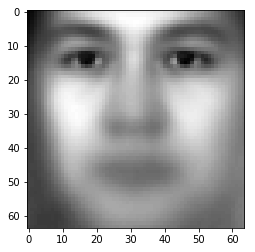

In [343]:
mean_image = np.mean(X_train, axis = 0)
plt.imshow(mean_image.reshape((64,64)).astype('uint8'))
print mean_image

In [345]:
X_train = X_train.astype('float64')
X_test = X_test.astype('float64')
X_train -= mean_image
X_test -= mean_image

In [346]:
print X_train
print X_test
print mean_image

[[ -14.5610992   -20.76983044  -24.86893393 ...,  -39.68846229  -35.5862405
   -33.47690509]
 [ -17.5610992   -18.76983044  -24.86893393 ...,  -39.68846229  -38.5862405
   -35.47690509]
 [ -18.5610992   -19.76983044  -21.86893393 ...,  -43.68846229  -44.5862405
   -49.47690509]
 ..., 
 [  20.4389008    17.23016956    5.13106607 ...,  185.31153771  184.4137595
   182.52309491]
 [  23.4389008     9.23016956   -1.86893393 ...,  186.31153771  184.4137595
   182.52309491]
 [  19.4389008    22.23016956   14.13106607 ...,  157.31153771  164.4137595
   166.52309491]]
[[ -15.5610992   -19.76983044  -25.86893393 ...,  -32.68846229  -29.5862405
   -29.47690509]
 [ -16.5610992   -18.76983044  -12.86893393 ...,  -32.68846229  -33.5862405
   -37.47690509]
 [ -22.5610992   -25.76983044  -28.86893393 ...,  -42.68846229  -46.5862405
   -51.47690509]
 ..., 
 [  -4.5610992    -8.76983044   -7.86893393 ...,  -20.68846229  -22.5862405
   -27.47690509]
 [ -10.5610992   -13.76983044  -16.86893393 ...,  -43.6

In [347]:
from sklearn.decomposition import PCA

pca = PCA(n_components = 120)

#transform the training data
X_train_reduced = pca.fit_transform(X_train)
#transform the test data
X_test_reduced = pca.transform(X_test)

print X_train_reduced.shape
print X_test_reduced.shape

(10262, 120)
(1292, 120)


In [428]:

from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='sgd', alpha=10,hidden_layer_sizes=(64, 64), random_state=1, 
                    verbose = True, max_iter=1000, learning_rate = 'adaptive',
                    learning_rate_init =5e-4, validation_fraction = 0.2)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print predictions
print predictions.shape

Iteration 1, loss = 14.79788952
Iteration 2, loss = 10.43282327
Iteration 3, loss = 10.24745863
Iteration 4, loss = 10.06937694
Iteration 5, loss = 9.89856033
Iteration 6, loss = 9.72694889
Iteration 7, loss = 9.55193791
Iteration 8, loss = 9.36518720
Iteration 9, loss = 9.16234605
Iteration 10, loss = 8.95665884
Iteration 11, loss = 8.74193540
Iteration 12, loss = 8.51902245
Iteration 13, loss = 8.27481705
Iteration 14, loss = 8.03034407
Iteration 15, loss = 7.78150313
Iteration 16, loss = 7.51841880
Iteration 17, loss = 7.22861838
Iteration 18, loss = 6.87808836
Iteration 19, loss = 6.46267847
Iteration 20, loss = 6.05129436
Iteration 21, loss = 5.67319761
Iteration 22, loss = 5.31849014
Iteration 23, loss = 4.99176682
Iteration 24, loss = 4.67442957
Iteration 25, loss = 4.40137285
Iteration 26, loss = 4.14211277
Iteration 27, loss = 3.91319671
Iteration 28, loss = 3.71455549
Iteration 29, loss = 3.54035645
Iteration 30, loss = 3.40273375
Iteration 31, loss = 3.27340097
Iteration 32,

In [429]:

print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     1.0000    1.0000    1.0000        19
          2     1.0000    1.0000    1.0000        19
          3     1.0000    1.0000    1.0000        19
          4     1.0000    1.0000    1.0000        19
          5     1.0000    1.0000    1.0000        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     1.0000    1.0000    1.0000        19
          9     0.9500    1.0000    0.9744        19
         10     1.0000    1.0000    1.0000        19
         11     1.0000    1.0000    1.0000        19
         12     0.9500    1.0000    0.9744        19
         13     1.0000    1.0000    1.0000        19
         14     1.0000    1.0000    1.0000        19
         15     1.0000    0.9474    0.9730        19
         16     0.9500    1.0000    0.9744        19
         17     1.0000    0.9474    0.9730        19
         18     1.0000    1.0000    1.0000   

In [495]:
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import classification_report

clf = MLPClassifier(solver='adam', alpha=1e-4,hidden_layer_sizes=(256, 256), random_state=1, 
                    verbose = True, max_iter=1000,
                    learning_rate_init =2e-4, validation_fraction = 0.2)

clf.fit(X_train, y_train)
predictions = clf.predict(X_test)

print predictions
print predictions.shape

Iteration 1, loss = 4.02821912
Iteration 2, loss = 3.37128261
Iteration 3, loss = 2.59132127
Iteration 4, loss = 1.94977171
Iteration 5, loss = 1.50433490
Iteration 6, loss = 1.19360477
Iteration 7, loss = 0.98760860
Iteration 8, loss = 0.82407210
Iteration 9, loss = 0.71106515
Iteration 10, loss = 0.61566843
Iteration 11, loss = 0.54200626
Iteration 12, loss = 0.47741567
Iteration 13, loss = 0.42638353
Iteration 14, loss = 0.38494989
Iteration 15, loss = 0.34803336
Iteration 16, loss = 0.31943268
Iteration 17, loss = 0.29203222
Iteration 18, loss = 0.26856724
Iteration 19, loss = 0.24637371
Iteration 20, loss = 0.23008601
Iteration 21, loss = 0.21490232
Iteration 22, loss = 0.19517467
Iteration 23, loss = 0.18298236
Iteration 24, loss = 0.17166224
Iteration 25, loss = 0.15686710
Iteration 26, loss = 0.14820937
Iteration 27, loss = 0.13901621
Iteration 28, loss = 0.13071536
Iteration 29, loss = 0.12197775
Iteration 30, loss = 0.11474541
Iteration 31, loss = 0.10665984
Iteration 32, los

In [496]:
print classification_report(y_test, predictions, digits = 4)

             precision    recall  f1-score   support

          1     0.9500    1.0000    0.9744        19
          2     1.0000    1.0000    1.0000        19
          3     1.0000    1.0000    1.0000        19
          4     1.0000    1.0000    1.0000        19
          5     1.0000    1.0000    1.0000        19
          6     1.0000    1.0000    1.0000        19
          7     1.0000    1.0000    1.0000        19
          8     1.0000    0.9474    0.9730        19
          9     1.0000    1.0000    1.0000        19
         10     1.0000    1.0000    1.0000        19
         11     1.0000    1.0000    1.0000        19
         12     1.0000    1.0000    1.0000        19
         13     1.0000    1.0000    1.0000        19
         14     1.0000    1.0000    1.0000        19
         15     1.0000    0.9474    0.9730        19
         16     1.0000    1.0000    1.0000        19
         17     0.9474    0.9474    0.9474        19
         18     1.0000    1.0000    1.0000   

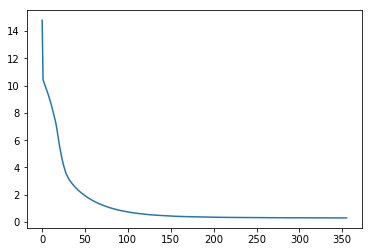

In [437]:
from sklearn.metrics import precision_recall_curve
from sklearn.metrics import average_precision_score

f, ax = plt.subplots(1,1)
ax.plot(clf.loss_curve_)

In [497]:
from sklearn.preprocessing import MinMaxScaler

# different learning rate schedules and momentum parameters
params = [{'solver': 'sgd', 'learning_rate': 'constant', 'momentum': 0,
           'nesterovs_momentum': False, 'learning_rate_init': 4e-4, 
           'hidden_layer_sizes': (128, 128), 'validation_fraction':0.2},
          {'solver': 'sgd', 'learning_rate': 'constant', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 4e-4, 
           'hidden_layer_sizes': (128, 128), 'validation_fraction':0.2},
          {'solver': 'sgd', 'learning_rate': 'adaptive', 'momentum': 0,
           'nesterovs_momentum': False, 'learning_rate_init': 4e-4, 
           'hidden_layer_sizes': (128, 128), 'validation_fraction':0.2},
          {'solver': 'sgd', 'learning_rate': 'adaptive', 'momentum': .9,
           'nesterovs_momentum': False, 'learning_rate_init': 4e-4, 
           'hidden_layer_sizes': (128, 128), 'validation_fraction':0.2},
          {'solver': 'adam', 'learning_rate_init': 4e-4,
           'hidden_layer_sizes': (128, 128), 'validation_fraction':0.2}]

labels = [ "constant learning-rate",
          "constant with momentum",
           "adaptive learning-rate",
          "adaptive with momentum", "adam"]

plot_args = [{'c': 'red', 'linestyle': '-'},
             {'c': 'blue', 'linestyle': '-'},
             {'c': 'red', 'linestyle': '--'},
             {'c': 'green', 'linestyle': '--'},
             {'c': 'black', 'linestyle': '-'}]


X_train = MinMaxScaler().fit_transform(X_train)

mlps = []
max_iter = 1000

for label, param in zip(labels, params):
    print("training: %s" % label)
    mlp = MLPClassifier(verbose=0, random_state=1,
                        max_iter=max_iter, **param)
    mlp.fit(X_train, y_train)
    mlps.append(mlp)
    print("Training set score: %f" % mlp.score(X_train, y_train))
    print("Training set loss: %f" % mlp.loss_)


training: constant learning-rate
Training set score: 0.858312
Training set loss: 1.003379
training: constant with momentum
Training set score: 0.996297
Training set loss: 0.046528
training: adaptive learning-rate
Training set score: 0.858312
Training set loss: 1.003379
training: adaptive with momentum
Training set score: 0.996394
Training set loss: 0.045860
training: adam
Training set score: 1.000000
Training set loss: 0.010441


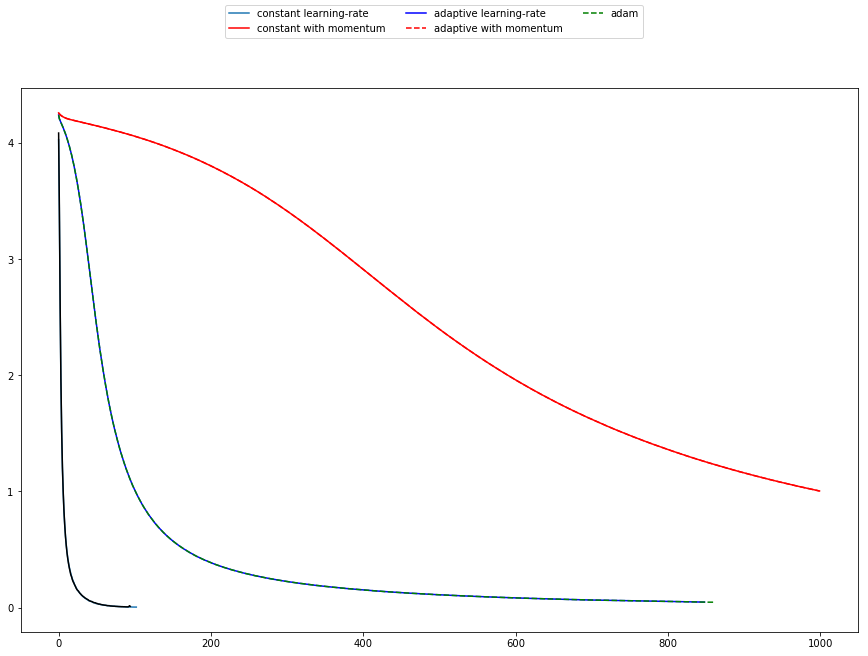

In [501]:
fig, ax = plt.subplots(1,1, figsize=(15, 10))

ax.plot(clf.loss_curve_)
for mlp, label, args in zip(mlps, labels, plot_args):
        ax.plot(mlp.loss_curve_, label=label, **args)
fig.legend(ax.get_lines(), labels=labels, ncol=3, loc="upper center")
plt.show()



In [499]:
print X_train

[[ 0.04330709  0.03149606  0.03529412 ...,  0.11372549  0.13333333
   0.14901961]
 [ 0.03149606  0.03937008  0.03529412 ...,  0.11372549  0.12156863
   0.14117647]
 [ 0.02755906  0.03543307  0.04705882 ...,  0.09803922  0.09803922
   0.08627451]
 ..., 
 [ 0.18110236  0.18110236  0.15294118 ...,  0.99607843  0.99607843
   0.99607843]
 [ 0.19291339  0.1496063   0.1254902  ...,  1.          0.99607843
   0.99607843]
 [ 0.17716535  0.2007874   0.18823529 ...,  0.88627451  0.91764706
   0.93333333]]


In [500]:
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
print X_train
X_test = MinMaxScaler().fit_transform(X_test)
print X_test

print mlps[0].score(X_test, y_test)
print mlps[1].score(X_test, y_test)
print mlps[2].score(X_test, y_test)
print mlps[3].score(X_test, y_test)
print mlps[4].score(X_test, y_test)



[[ 0.04330709  0.03149606  0.03529412 ...,  0.11372549  0.13333333
   0.14901961]
 [ 0.03149606  0.03937008  0.03529412 ...,  0.11372549  0.12156863
   0.14117647]
 [ 0.02755906  0.03543307  0.04705882 ...,  0.09803922  0.09803922
   0.08627451]
 ..., 
 [ 0.18110236  0.18110236  0.15294118 ...,  0.99607843  0.99607843
   0.99607843]
 [ 0.19291339  0.1496063   0.1254902  ...,  1.          0.99607843
   0.99607843]
 [ 0.17716535  0.2007874   0.18823529 ...,  0.88627451  0.91764706
   0.93333333]]
[[ 0.03174603  0.03162055  0.02390438 ...,  0.14173228  0.15686275
   0.16535433]
 [ 0.02777778  0.03557312  0.07569721 ...,  0.14173228  0.14117647
   0.13385827]
 [ 0.00396825  0.00790514  0.01195219 ...,  0.1023622   0.09019608
   0.07874016]
 ..., 
 [ 0.07539683  0.07509881  0.09561753 ...,  0.18897638  0.18431373
   0.17322835]
 [ 0.0515873   0.05533597  0.05976096 ...,  0.0984252   0.09803922
   0.09448819]
 [ 0.37698413  0.76284585  0.71314741 ...,  0.31889764  0.29803922
   0.28346457]]


In [542]:
from sklearn.metrics import roc_curve, auc  
n_classes = 68
y_score = np.zeros((5,1292,68))
y_score[0] = mlps[0].predict_proba(X_test)
y_score[1] = mlps[1].predict_proba(X_test)
y_score[2] = mlps[2].predict_proba(X_test)
y_score[3] = mlps[3].predict_proba(X_test)
y_score[4] = mlps[4].predict_proba(X_test)

print y_score[4]
print y_test.shape

# Compute ROC curve and ROC area for each class
fpr = dict()
tpr = dict()
roc_auc = dict()
for i in range(n_classes):
    fpr[i], tpr[i], _ = roc_curve(y_test, y_score[3][:, i],pos_label = i+1)
    roc_auc[i] = auc(fpr[i], tpr[i])
    
    

[[  1.07690928e-04   2.23549744e-07   5.82647599e-06 ...,   9.12414830e-04
    1.95499182e-07   8.23952126e-01]
 [  1.87674450e-16   9.17897695e-20   5.38122057e-28 ...,   6.57337734e-21
    6.45404694e-32   9.99999903e-01]
 [  3.14120189e-23   4.32402896e-22   1.55620991e-33 ...,   3.30964089e-20
    1.44286333e-32   9.99999995e-01]
 ..., 
 [  9.99999734e-01   5.08646554e-27   8.28162699e-24 ...,   8.59349765e-12
    8.09778577e-26   1.35402529e-16]
 [  9.94242646e-01   2.67575232e-11   2.81022743e-06 ...,   8.40160387e-05
    1.09913520e-10   6.07127744e-07]
 [  9.93023500e-01   1.06812650e-23   8.57888085e-14 ...,   3.11230485e-06
    4.47625614e-24   3.62270286e-15]]
(1292,)


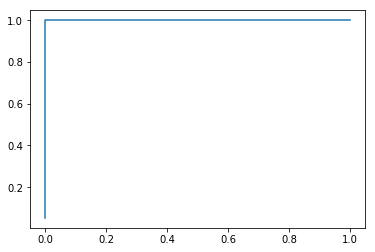

In [544]:
plt.figure(1)
plt.plot(fpr[0], tpr[0], label='RT + LR')

[array([[-0.006284  ,  0.01157359, -0.05296488, ...,  0.00644019,
         0.02605744,  0.0150437 ],
       [-0.02836106, -0.0175688 , -0.00569622, ...,  0.04135069,
         0.02536925,  0.01283662],
       [ 0.00559049,  0.01372721, -0.02122524, ...,  0.01221343,
         0.05182497, -0.03529575],
       ..., 
       [ 0.01474486, -0.01089187,  0.00087339, ..., -0.04679772,
         0.02229567, -0.01826875],
       [ 0.03687052, -0.00244123, -0.0156651 , ..., -0.03135038,
         0.01811498, -0.00354547],
       [ 0.01699052, -0.01083693,  0.00937668, ..., -0.0078342 ,
         0.04589525,  0.00724985]]), array([[ 0.02075026,  0.13806303, -0.10987755, ...,  0.09887267,
         0.03676084, -0.02985451],
       [-0.04414587, -0.13472099, -0.11307477, ..., -0.04036091,
         0.08519202,  0.14011285],
       [-0.02216114,  0.14126463, -0.0693511 , ...,  0.13687222,
        -0.06988495,  0.10036402],
       ..., 
       [-0.05397002,  0.05139513, -0.08394876, ...,  0.00392275,
      

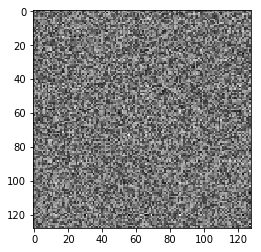

In [520]:
print mlps[0].coefs_
print np.array(mlps[4].coefs_)[1].shape
plt.imshow(np.array(mlps[0].coefs_)[1], interpolation='nearest')

In [172]:
N_train = X_train.shape[0]
N_test = X_test.shape[0]
print N_train, N_test
X_train = X_train.astype(np.uint8)
y_train = y_train.astype(np.uint8)
X_test = X_test.astype(np.uint8)
y_test = y_test.astype(np.uint8)

X_train = X_train.reshape((N_train,1,64,64))
X_test = X_test.reshape((N_test,1,64,64))

print X_train
print X_test.shape
print y_train.shape
print y_test.shape
print X_train.dtype

10262 1292
[[[[ 12   9   9 ...,  20  13  11]
   [ 11  12   7 ...,  28  17  11]
   [ 11   9   8 ...,  33  23  19]
   ..., 
   [  7   7   7 ...,  29  30  32]
   [  7   7   7 ...,  27  33  35]
   [  6   6   5 ...,  29  34  38]]]


 [[[  9  11   9 ...,  21  14  10]
   [ 10   9   6 ...,  28  20  17]
   [ 10   9   5 ...,  33  23  18]
   ..., 
   [  6   6   6 ...,  30  29  33]
   [  6   7   7 ...,  28  31  35]
   [  8   7   7 ...,  29  31  36]]]


 [[[  8  10  12 ...,  26  24  17]
   [  8  11  12 ...,  32  27  21]
   [  7  10   9 ...,  40  36  24]
   ..., 
   [  7   6   6 ...,  32  32  30]
   [  7   7   7 ...,  30  26  27]
   [  7   7   7 ...,  25  25  22]]]


 ..., 
 [[[ 47  47  39 ..., 101 113 132]
   [ 49  47  33 ...,  90 117 126]
   [ 50  46  35 ...,  84 119 123]
   ..., 
   [ 35  38  40 ..., 254 254 254]
   [ 32  35  37 ..., 254 254 254]
   [ 33  35  35 ..., 254 254 254]]]


 [[[ 50  39  32 ...,  20  62 106]
   [ 49  41  30 ...,  19  74 120]
   [ 49  42  38 ...,  15  66 130]
   ..., 
   

In [66]:
# http://deepdish.io/2015/04/28/creating-lmdb-in-python/
def load_data_into_lmdb(lmdb_name, features, labels=None):
    env = lmdb.open(lmdb_name, map_size=features.nbytes*2)
    
    features = features[:,:,None,None]
    for i in range(features.shape[0]):
        datum = caffe.proto.caffe_pb2.Datum()
        
        datum.channels = features.shape[1]
        datum.height = 64
        datum.width = 64
        
        if features.dtype == np.uint8:
            datum.data = features[i].tostring()
        elif features.dtype == np.float: 
            datum.float_data.extend(features[i].flat)
        else:
            raise Exception("features.dtype unknown.")
        
        if labels is not None:
            datum.label = int(labels[i])
        
        str_id = '{:08}'.format(i)
        with env.begin(write=True) as txn:
            txn.put(str_id, datum.SerializeToString())

In [67]:
load_data_into_lmdb("dataset/train_data_lmdb", X_train, y_train)
load_data_into_lmdb("dataset/test_data_lmdb", X_test, y_test)

In [68]:
def get_data_for_case_from_lmdb(lmdb_name, id):
    lmdb_env = lmdb.open(lmdb_name, readonly=True)
    lmdb_txn = lmdb_env.begin()

    raw_datum = lmdb_txn.get(id)
    datum = caffe.proto.caffe_pb2.Datum()
    datum.ParseFromString(raw_datum)
    
    feature = caffe.io.datum_to_array(datum)
    label = datum.label

    return (label, feature)


In [69]:
get_data_for_case_from_lmdb("dataset/train_data_lmdb", "00000001")


(68, array([[[ 9, 11,  9, ..., 21, 14, 10],
         [10,  9,  6, ..., 28, 20, 17],
         [10,  9,  5, ..., 33, 23, 18],
         ..., 
         [ 6,  6,  6, ..., 30, 29, 33],
         [ 6,  7,  7, ..., 28, 31, 35],
         [ 8,  7,  7, ..., 29, 31, 36]]], dtype=uint8))

In [18]:
from pylab import *
import tempfile
dummy_data = L.DummyData(shape=dict(dim=[1, 3, 227, 227]))
imagenet_net_filename = caffenet(data=dummy_data, train=False)
imagenet_net = caffe.Net(imagenet_net_filename, weights, caffe.TEST)


In [ ]:
def style_net(train=True, learn_all=False, subset=None):
    if subset is None:
        subset = 'train' if train else 'test'
    source = caffe_root + 'data/flickr_style/%s.txt' % subset
    transform_param = dict(mirror=train, crop_size=227,
        mean_file=caffe_root + 'data/ilsvrc12/imagenet_mean.binaryproto')
    style_data, style_label = L.ImageData(
        transform_param=transform_param, source=source,
        batch_size=50, new_height=256, new_width=256, ntop=2)
    return caffenet(data=style_data, label=style_label, train=train,
                    num_classes=NUM_STYLE_LABELS,
                    classifier_name='fc8_flickr',
                    learn_all=learn_all)

In [3]:
# Download just a small subset of the data for this exercise.
# (2000 of 80K images, 5 of 20 labels.)
# To download the entire dataset, set `full_dataset = True`.
full_dataset = False
if full_dataset:
    NUM_STYLE_IMAGES = NUM_STYLE_LABELS = -1
else:
    NUM_STYLE_IMAGES = 2000
    NUM_STYLE_LABELS = 5

# This downloads the ilsvrc auxiliary data (mean file, etc),
# and a subset of 2000 images for the style recognition task.
import os
os.chdir(caffe_root)  # run scripts from caffe root
!python examples/finetune_flickr_style/assemble_data.py \
    --workers=-1  --seed=1701 \
    --images=$NUM_STYLE_IMAGES  --label=$NUM_STYLE_LABELS
# back to examples
os.chdir('examples')

Writing train/val for 0 successfully downloaded images.
